In [1]:
import pandas as pd

# Load the Excel file
file_path = 'data.xlsx'

# Load each sheet into a DataFrame
df_2009_2010 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
df_2010_2011 = pd.read_excel(file_path, sheet_name='Year 2010-2011')

# Combine the DataFrames
df = pd.concat([df_2009_2010, df_2010_2011])

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

# Display the combined DataFrame
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [2]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [4]:
#Checking missing values
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [5]:
#Handling missing values
df.dropna(subset = ['Customer ID'], axis=0, inplace = True)
print(f'Shape after removing null values from the dataset : {df.shape}')

Shape after removing null values from the dataset : (824364, 8)


In [6]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [7]:
#Checking negative values
df.describe()

,Quantity,Price,Customer ID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
#Columns having negative values
df[(df['Quantity']<= 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [9]:
df['Invoice'].str.contains('C').sum()

18744

In [10]:
df = df[~df['Invoice'].str.contains('C', na=False)]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [11]:
df['Description'] = df['Description'].str.strip()

In [12]:
#Remove duplicate values
df.duplicated().sum()

26125

In [13]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [14]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


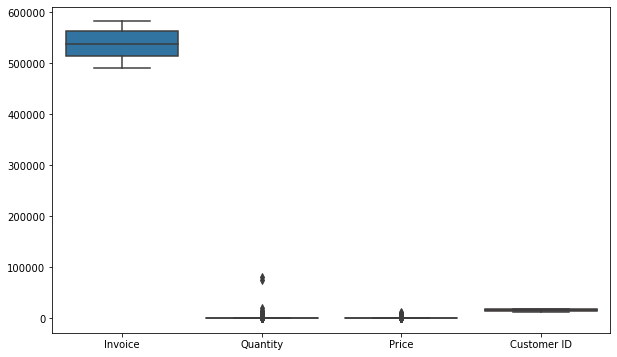

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Check for Outliers
plt.figure(figsize=(10,6))
sns.boxplot(data = df)
plt.show()

In [16]:
#We will remove the extreme outliers
Q1 = df[['Quantity', 'Price']].quantile(0.01)
Q3 = df[['Quantity', 'Price']].quantile(0.99)
IQR = Q3 - Q1

df_outliers = df[((df[['Quantity', 'Price']] < (Q1 - 1.5 * IQR)) | (df[['Quantity', 'Price']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
df_outliers

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
217,489460,84598,BOYS ALPHABET IRON ON PATCHES,576,2009-12-01 10:46:00,0.21,16167.0,United Kingdom
575,489523,84879,ASSORTED COLOUR BIRD ORNAMENT,800,2009-12-01 11:46:00,1.45,12931.0,United Kingdom
1344,489562,84472,PINK AND LILAC QUILTED THROW,1,2009-12-01 13:07:00,45.95,17998.0,United Kingdom
...,...,...,...,...,...,...,...,...
1063344,581375,21137,BLACK RECORD COVER FRAME,960,2011-12-08 12:36:00,3.39,16210.0,United Kingdom
1065522,581457,23543,WALL ART KEEP CALM,698,2011-12-08 18:43:00,4.15,18102.0,United Kingdom
1065531,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949.0,United Kingdom
1065532,581459,22197,POPCORN HOLDER,1200,2011-12-08 18:46:00,0.72,17949.0,United Kingdom


In [18]:
df = df.drop(df_outliers.index)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [19]:
df.describe()

,Quantity,Price,Customer ID
count,776391.000000,776391.000000,776391.000000
mean,11.345298,2.898952,15320.595952
std,22.899219,2.926694,1694.942599
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13974.000000
50%,6.000000,1.950000,15249.000000
75%,12.000000,3.750000,16794.000000
max,352.000000,36.800000,18287.000000


In [20]:
#Final shape of the dataset
print(f' Final shape of the dataset : {df.shape}')

 Final shape of the dataset : (776391, 8)


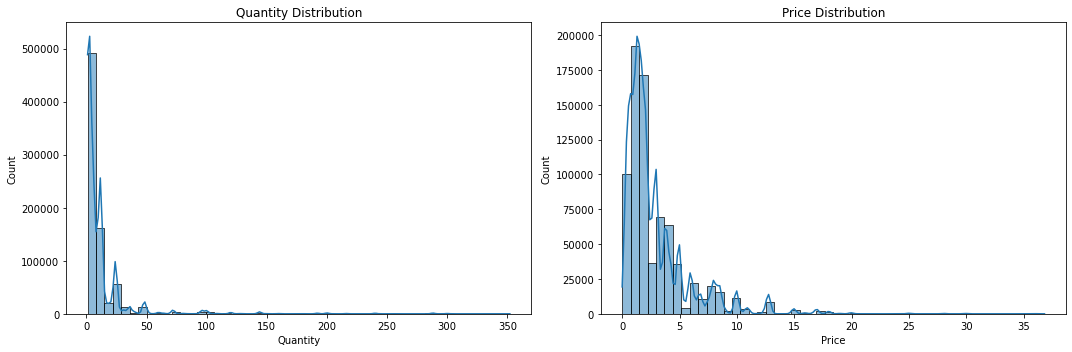

In [21]:
#Exploratory Data Analysis
figs, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['Quantity'], bins = 50, kde = True, ax = axes[0])
axes[0].set_title('Quantity Distribution')

sns.histplot(df['Price'], bins = 50, kde = True, ax = axes[1])
axes[1].set_title('Price Distribution')

plt.tight_layout()
plt.show()

In [22]:
#Top 20 products based on quantities sold
product_quantity = df.groupby(df['Description'])['Quantity'].sum().reset_index()
sorted_product_quantity = product_quantity.sort_values(by = 'Quantity', ascending = False)
# Let's get the top 20 products that are brought by consumers
top_20_products = sorted_product_quantity.head(20)

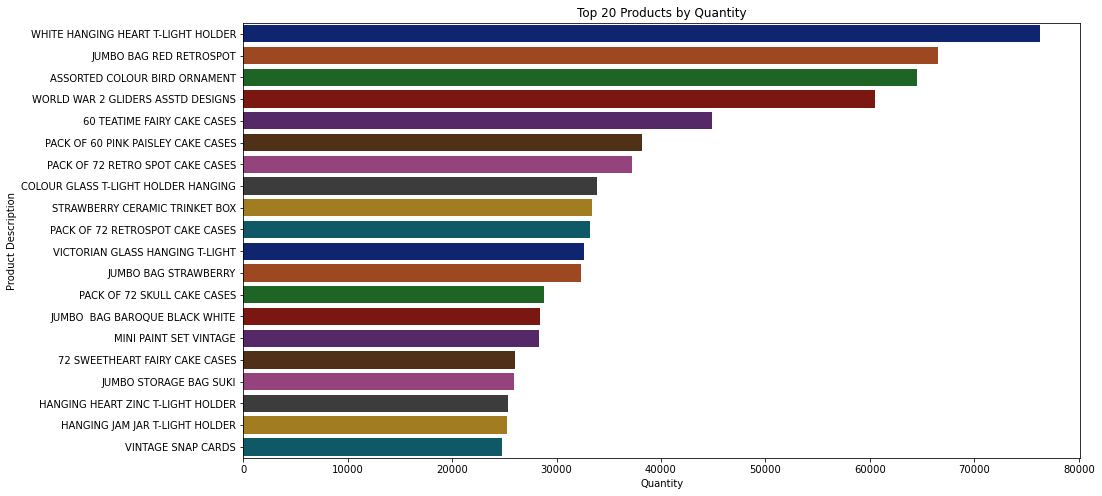

In [23]:
# Plot the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Quantity', y='Description', data=top_20_products, palette='dark')
plt.title(f'Top 20 Products by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Product Description')
plt.show()

In [24]:
#Least sold products
product_quantity = df.groupby(df['Description'])['Quantity'].sum().reset_index()
sorted_product_quantity = product_quantity.sort_values(by = 'Quantity', ascending = True)
# Let's get the top 20 products that are brought by consumers
low_20_products = sorted_product_quantity.head(20)

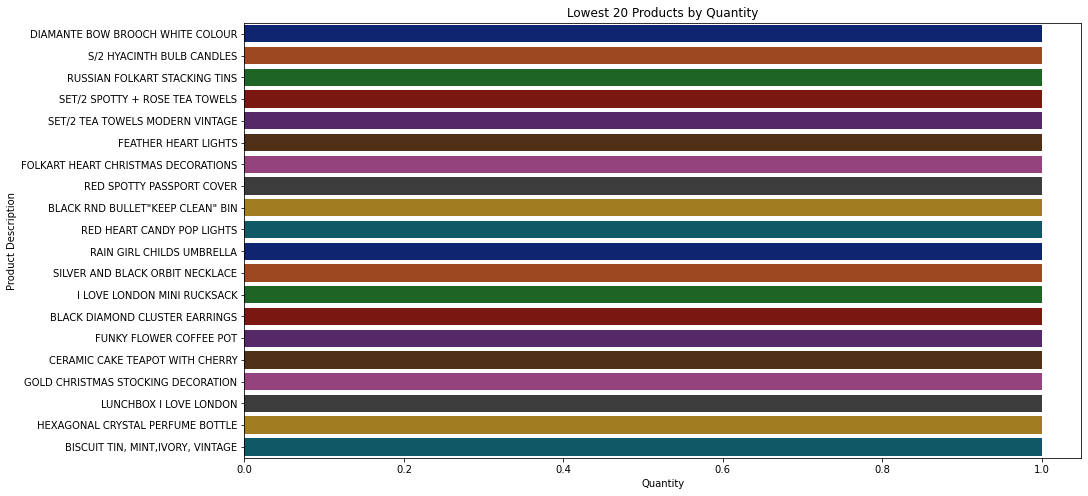

In [25]:
# Plot the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Quantity', y='Description', data=low_20_products, palette='dark')
plt.title(f'Lowest 20 Products by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Product Description')
plt.show()

In [26]:
#Top 10 countries based on total transactions and amount spent in sales
df['Amount'] = df['Quantity'] * df['Price']

In [27]:
country_sales = df.groupby('Country')['Amount'].sum().reset_index()
country_sales = country_sales.sort_values(by = 'Amount', ascending=False)
top_10_country_sales = country_sales.head(10)
top_10_country_sales

,Country,Amount
38,United Kingdom,1.293315e+07
10,EIRE,5.611988e+05
24,Netherlands,5.044959e+05
14,Germany,4.182632e+05
13,France,3.181182e+05
0,Australia,1.585301e+05
32,Spain,9.383353e+04
34,Switzerland,9.341204e+04
33,Sweden,7.437688e+04
3,Belgium,6.336422e+04


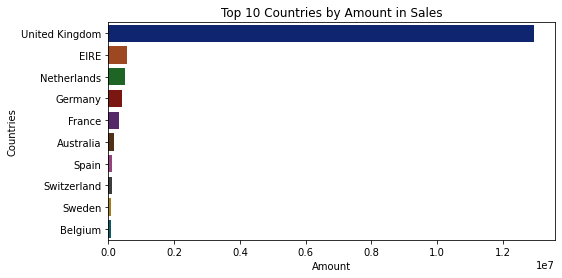

In [28]:
# Plot the bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Amount', y='Country', data=top_10_country_sales, palette='dark')
plt.title(f'Top 10 Countries by Amount in Sales')
plt.xlabel('Amount')
plt.ylabel('Countries')
plt.show()

In [29]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(df['Quantity'], df['Price'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
# Interpretation
if correlation_coefficient > 0:
    print("There is a positive correlation between Quantity and Price.")
elif correlation_coefficient < 0:
    print("There is a negative correlation between Quantity and Price.")
else:
    print("There is no correlation between Quantity and Price.")

Pearson Correlation Coefficient: -0.1904679512762879
There is a negative correlation between Quantity and Price.


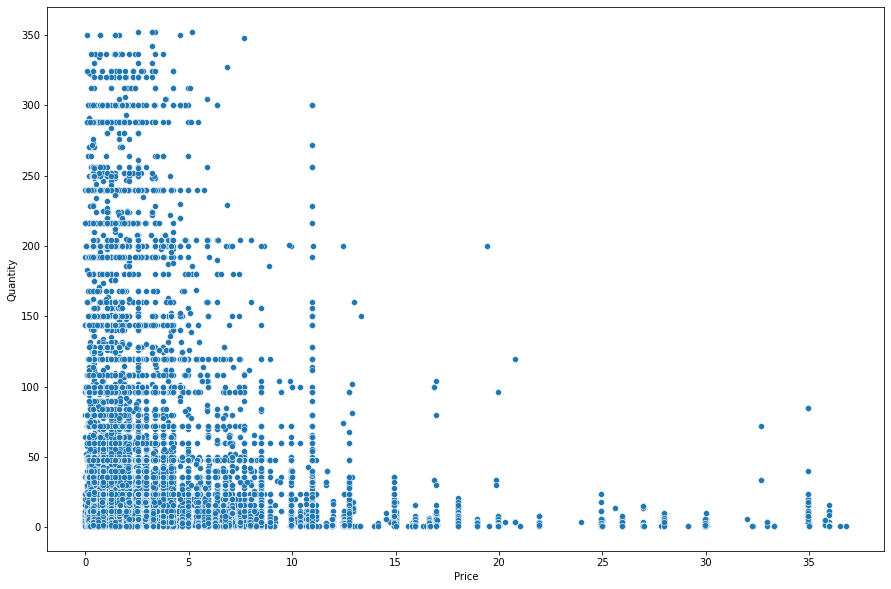

In [30]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = df['Price'], y = df['Quantity'])
plt.show()

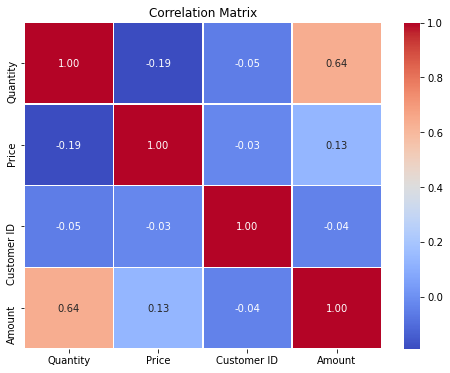

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Calculating RFM metrics
current_date = max(df['InvoiceDate'])  # Current date

# Calculate Recency, Frequency, and Monetary metrics for each customer
rfm_df = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency
    'Amount': 'sum'  # Monetary value
})

# Rename columns
rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'Amount': 'Monetary'
}, inplace=True)

# Print the first few rows of the RFM DataFrame
rfm_df = rfm_df.sort_values(by = 'Monetary',ascending = False)
rfm_df.head()

,Recency,Frequency,Monetary
Customer ID,,,
14646.0,1,146,480051.24
18102.0,0,134,431479.14
14156.0,9,146,279373.90
14911.0,0,376,270586.49
13694.0,3,136,183223.01


In [33]:
def create_segments(row):
    if row['Recency'] <= 30 and row['Frequency'] >= 100 and row['Monetary'] >= 50000:
        return 'High-Value Customer'
    elif row['Recency'] > 90 and row['Frequency'] < 3:
        return 'Churn Risk'
    else:
        return 'Regular Customer'

rfm_df['Segment'] = rfm_df.apply(create_segments, axis=1)

print("RFM Analysis with Segments:")
rfm_df.head(20)

RFM Analysis with Segments:


,Recency,Frequency,Monetary,Segment
Customer ID,,,,
14646.0,1,146,480051.24,High-Value Customer
18102.0,0,134,431479.14,High-Value Customer
14156.0,9,146,279373.90,High-Value Customer
14911.0,0,376,270586.49,High-Value Customer
13694.0,3,136,183223.01,High-Value Customer
17511.0,2,60,171593.92,Regular Customer
12415.0,23,26,134763.45,Regular Customer
16684.0,3,49,120013.25,Regular Customer
15061.0,3,123,117759.34,High-Value Customer


In [34]:
r_labels, f_labels, m_labels = range(1, 6), range(1,6), range(1,6)
# Define custom bins (adjust according to your data distribution)
custom_bins = [0, 5, 10, 20, 30, 1000]

# Use pd.cut() with custom bins
rfm_df['r_score'] = pd.qcut(rfm_df['Recency'], q=5, labels=r_labels).astype(int)
rfm_df['f_score'] = pd.cut(rfm_df['Frequency'], bins=custom_bins, labels=f_labels).astype(int)
rfm_df['m_score'] = pd.qcut(rfm_df['Monetary'], q=5, labels=m_labels).astype(int)

rfm_df['rfm_sum'] = rfm_df['r_score'] + rfm_df['m_score'] + rfm_df['f_score']
rfm_df = rfm_df.sort_values(by = "rfm_sum",ascending = False)
rfm_df

,Recency,Frequency,Monetary,Segment,r_score,f_score,m_score,rfm_sum
Customer ID,,,,,,,,
12835.0,427,41,5996.83,Regular Customer,5,5,5,15
17448.0,496,46,14523.67,Regular Customer,5,5,5,15
17850.0,371,155,51208.87,Regular Customer,4,5,5,14
13564.0,353,36,15818.33,Regular Customer,4,5,5,14
13093.0,275,55,54144.25,Regular Customer,4,5,5,14
...,...,...,...,...,...,...,...,...
18249.0,16,1,95.34,Regular Customer,1,1,1,3
14578.0,2,1,168.63,Regular Customer,1,1,1,3
17737.0,8,2,168.24,Regular Customer,1,1,1,3


In [35]:
def assign_label(df, r_rule, fm_rule, label, colname='rfm_label'):
    df.loc[(df['r_score'].between(r_rule[0], r_rule[1]))
            & (df['f_score'].between(fm_rule[0], fm_rule[1])), colname] = label
    return df

In [36]:
rfm_df['rfm_label'] = ''

rfm_df = assign_label(rfm_df, (5,5), (4,5), 'champions')
rfm_df = assign_label(rfm_df, (3,4), (4,5), 'loyal customers')
rfm_df = assign_label(rfm_df, (4,5), (2,3), 'potential loyalist')
rfm_df = assign_label(rfm_df, (5,5), (1,1), 'new customers')
rfm_df = assign_label(rfm_df, (4,4), (1,1), 'promising')
rfm_df = assign_label(rfm_df, (3,3), (3,3), 'needing attention')
rfm_df = assign_label(rfm_df, (3,3), (1,2), 'about to sleep')
rfm_df = assign_label(rfm_df, (1,2), (3,4), 'at risk')
rfm_df = assign_label(rfm_df, (1,2), (5,5), 'cant loose them')
rfm_df = assign_label(rfm_df, (1,2), (1,2), 'hibernating')
rfm_df

,Recency,Frequency,Monetary,Segment,r_score,f_score,m_score,rfm_sum,rfm_label
Customer ID,,,,,,,,,
12835.0,427,41,5996.83,Regular Customer,5,5,5,15,champions
17448.0,496,46,14523.67,Regular Customer,5,5,5,15,champions
17850.0,371,155,51208.87,Regular Customer,4,5,5,14,loyal customers
13564.0,353,36,15818.33,Regular Customer,4,5,5,14,loyal customers
13093.0,275,55,54144.25,Regular Customer,4,5,5,14,loyal customers
...,...,...,...,...,...,...,...,...,...
18249.0,16,1,95.34,Regular Customer,1,1,1,3,hibernating
14578.0,2,1,168.63,Regular Customer,1,1,1,3,hibernating
17737.0,8,2,168.24,Regular Customer,1,1,1,3,hibernating


C:\Users\Dnyanjyot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dnyanjyot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dnyanjyot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

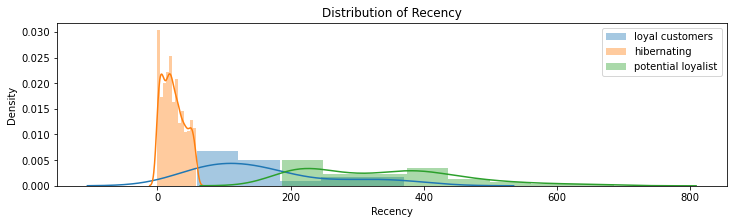

C:\Users\Dnyanjyot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dnyanjyot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dnyanjyot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

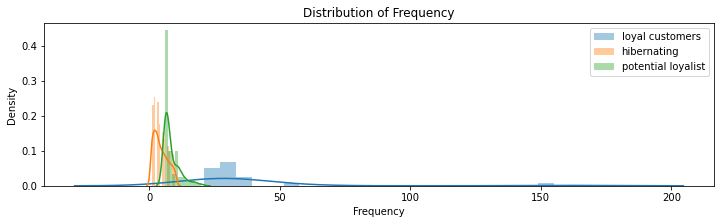

C:\Users\Dnyanjyot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dnyanjyot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dnyanjyot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

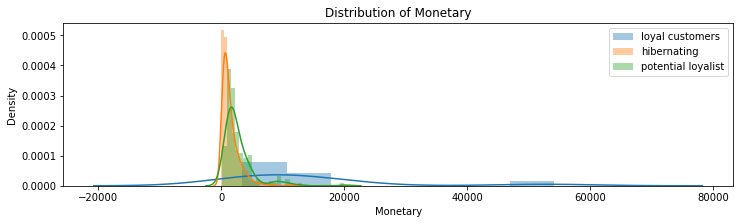

In [37]:
segments = ['loyal customers', 'hibernating', 'potential loyalist']

for col in ['Recency','Frequency','Monetary']:
    fig, ax = plt.subplots(figsize=(12,3))
    for segment in segments:
        sns.distplot(rfm_df[rfm_df['rfm_label']==segment][col], label=segment)
    ax.set_title('Distribution of %s' % col)
    plt.legend()
    plt.show()

In [38]:
#K-Means Clustering for customer segmentation

cluster_df = pd.DataFrame()
for i in ['Recency','Frequency','Monetary']:
    cluster_df[i] = rfm_df[i]
cluster_df

,Recency,Frequency,Monetary
Customer ID,,,
12835.0,427,41,5996.83
17448.0,496,46,14523.67
17850.0,371,155,51208.87
13564.0,353,36,15818.33
13093.0,275,55,54144.25
...,...,...,...
18249.0,16,1,95.34
14578.0,2,1,168.63
17737.0,8,2,168.24


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_cluster_scaled = scaler.fit_transform(cluster_df)
rfm_cluster_scaled

array([[ 1.08982186,  2.74098725,  0.27674209],
       [ 1.42037469,  3.13526791,  0.98779456],
       [ 0.8215471 , 11.73058631,  4.0469703 ],
       ...,
       [-0.9174482 , -0.3344019 , -0.20930354],
       [-0.88870448, -0.41325804, -0.20197607],
       [-0.869542  , -0.3344019 , -0.20159497]])

C:\Users\Dnyanjyot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dnyanjyot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dnyanjyot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dnyanjyot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

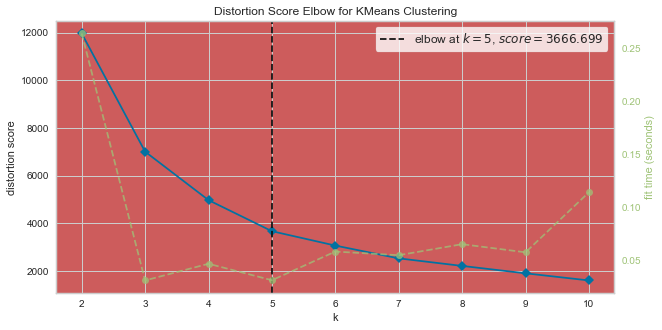

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Finding initial K value using Elbow Method
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("#cd5c5c")
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(rfm_cluster_scaled)
Elbow_M.show()

In [41]:
kmeans = KMeans(n_clusters = 5,max_iter = 50)
kmeans.fit(rfm_cluster_scaled)

C:\Users\Dnyanjyot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=5)

In [42]:
cluster_df['Clusters'] = kmeans.labels_
cluster_df

,Recency,Frequency,Monetary,Clusters
Customer ID,,,,
12835.0,427,41,5996.83,3
17448.0,496,46,14523.67,3
17850.0,371,155,51208.87,4
13564.0,353,36,15818.33,3
13093.0,275,55,54144.25,3
...,...,...,...,...
18249.0,16,1,95.34,0
14578.0,2,1,168.63,0
17737.0,8,2,168.24,0


In [43]:
# Centroids of the clusters
kmeans.cluster_centers_

array([[-0.60480772, -0.0772999 , -0.06824749],
       [-0.94379662, 15.31854032, 30.24506502],
       [ 1.28295517, -0.3195366 , -0.16649439],
       [-0.84561741,  1.89445728,  0.93238793],
       [-0.83373841,  9.96254882,  6.712379  ]])

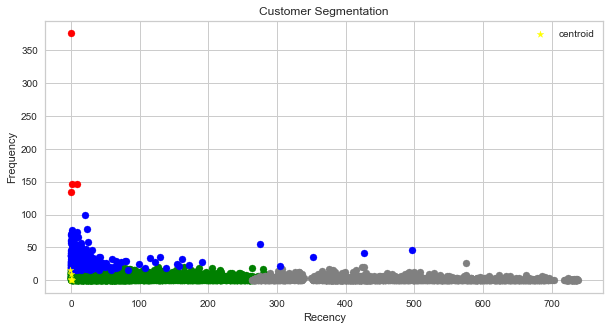

In [44]:
# grouping the data in accorandance with each cluster seperately
one = cluster_df[cluster_df["Clusters"]==0]
two = cluster_df[cluster_df["Clusters"]==1]
three = cluster_df[cluster_df["Clusters"]==2]
four = cluster_df[cluster_df["Clusters"]==3]
five = cluster_df[cluster_df['Clusters']==4]

#Checking the quality of clustering in the data set
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.scatter(one["Recency"],one["Frequency"],color='green')
plt.scatter(two["Recency"],two["Frequency"],color='red')
plt.scatter(three["Recency"],three["Frequency"],color='grey')
plt.scatter(four["Recency"],four["Frequency"],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",marker="*",label="centroid")
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Customer Segmentation')
plt.legend()
plt.show ()

In [45]:
#Checking stationarity

# Extracting relevant columns for time series analysis
time_series_data = df[['InvoiceDate', 'Amount']]

# Set 'InvoiceDate' as the index
time_series_data.set_index('InvoiceDate', inplace=True)

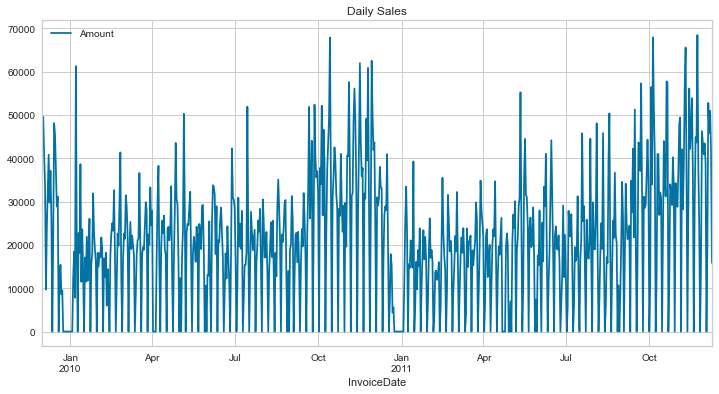

In [46]:
# Resample data by a specific frequency (e.g., daily)
resampled_data = time_series_data.resample('D').sum()

# Plot the resampled data
resampled_data.plot(figsize=(12, 6), title='Daily Sales')
plt.show()

In [47]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Plot rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    plt.plot(figsize=(12,8))
    plt.plot(timeseries, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std')
    plt.legend()
    plt.show()

    # Perform ADF test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

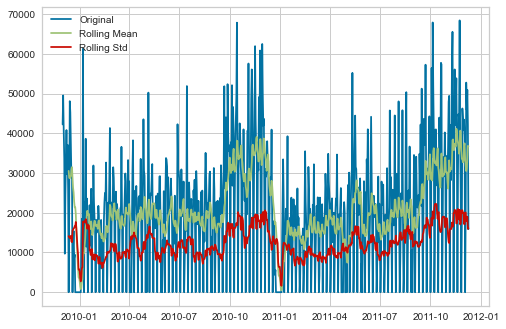

ADF Statistic: -2.6324236497324636
p-value: 0.0864793920275096
Critical Values: {'1%': -3.439490435810785, '5%': -2.8655738086413374, '10%': -2.568918067209286}


In [48]:
# Check stationarity
test_stationarity(resampled_data['Amount'])

In [49]:
# Make the time series stationary through differencing
resampled_data_diff = resampled_data.diff().dropna()

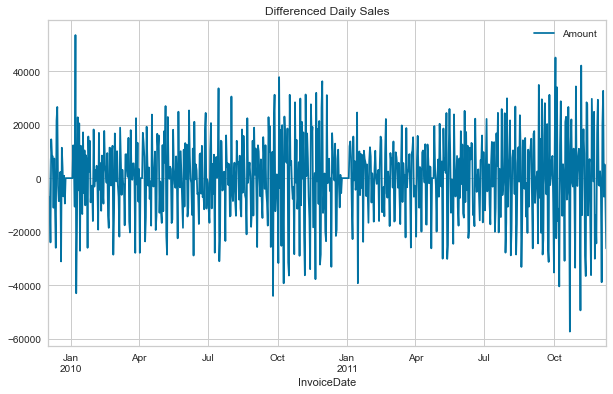

In [50]:
# Plot the differenced data
resampled_data_diff.plot(figsize=(10, 6), title='Differenced Daily Sales')
plt.show()

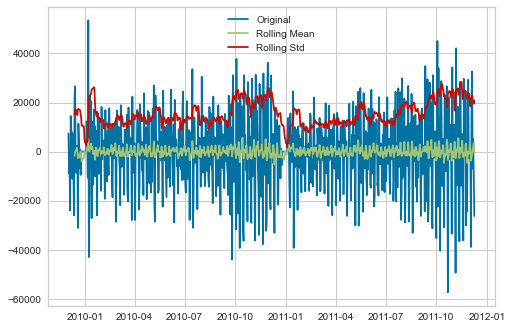

ADF Statistic: -9.79982237755707
p-value: 6.036754252973782e-17
Critical Values: {'1%': -3.439490435810785, '5%': -2.8655738086413374, '10%': -2.568918067209286}


In [51]:
# Check stationarity again
test_stationarity(resampled_data_diff['Amount'])

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import time

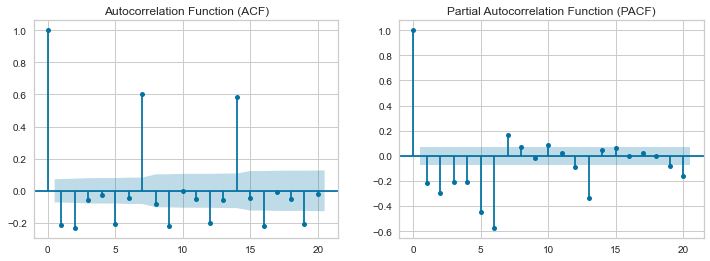

In [54]:
# Plot ACF and PACF to determine ARIMA parameters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot
plot_acf(resampled_data_diff, lags=20, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(resampled_data_diff, lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

In [55]:
# Build ARIMA model
p, d, q = 1, 1, 1  # Adjust parameters based on your plots
model = ARIMA(resampled_data, order=(p, d, q))
results = model.fit()

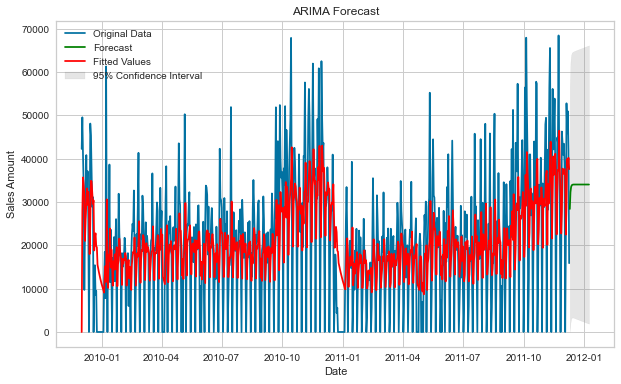

In [56]:
# Make forecasts
forecast_steps = 30  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean# Visualize results
plt.figure(figsize=(10,6))
plt.plot(resampled_data.index, resampled_data['Amount'], label='Original Data')
plt.plot(forecast_values.index, forecast_values, color='green', label='Forecast')
plt.plot(results.fittedvalues.index, results.fittedvalues, color='red', label='Fitted Values')
# Add confidence intervals
conf_int = forecast.conf_int()
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.2, label='95% Confidence Interval')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()